In [517]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [518]:
# Observacion de los primeros datos de la base de datos

oportunidades = pd.read_csv('Entrenamiento_ECI_2020.csv')
oportunidades['Account_Created_Date'] = pd.to_datetime(oportunidades['Account_Created_Date'])
oportunidades['Opportunity_Created_Date'] = pd.to_datetime(oportunidades['Opportunity_Created_Date'])
oportunidades['Quote_Expiry_Date'] = pd.to_datetime(oportunidades['Quote_Expiry_Date'])
oportunidades['Last_Modified_Date'] = pd.to_datetime(oportunidades['Last_Modified_Date'])
oportunidades['Planned_Delivery_Start_Date'] = pd.to_datetime(oportunidades['Planned_Delivery_Start_Date'])
oportunidades['Planned_Delivery_End_Date'] = pd.to_datetime(oportunidades['Planned_Delivery_End_Date'])
oportunidades.head(5)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [519]:
# Compruebo campos nulos en la base de datos
oportunidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  object        
 2   Territory                           16947 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Submitted_for_Approval              16947 non-null  int64         
 8   Bureaucratic_Code                   16947 non-null  object        
 9   Account_Created_Date                16947 non-null  datetime64[ns]
 10  Source                

In [520]:
# Remuevo los campos nulos de la base datos

oportunidades = oportunidades.dropna()
oportunidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10115 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  10115 non-null  int64         
 1   Region                              10115 non-null  object        
 2   Territory                           10115 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  10115 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    10115 non-null  int64         
 5   Bureaucratic_Code_0_Approval        10115 non-null  int64         
 6   Bureaucratic_Code_0_Approved        10115 non-null  int64         
 7   Submitted_for_Approval              10115 non-null  int64         
 8   Bureaucratic_Code                   10115 non-null  object        
 9   Account_Created_Date                10115 non-null  datetime64[ns]
 10  Source                

In [521]:
# Corroboro que tengo en la columna region
oportunidades['Region'].value_counts()

EMEA           3978
APAC           2256
Americas       2187
Japan          1528
Middle East     166
Name: Region, dtype: int64

In [522]:
# Claramente hay un error en los datos en region ya que japon pertenece a APAC
# por lo cual pasamos a reemplazar todos los campos en region que contengan a japon

oportunidades['Region'] = oportunidades['Region'].replace({'Japan':'APAC', 'Middle East':'EMEA'})
oportunidades['Region'].value_counts()

EMEA        4144
APAC        3784
Americas    2187
Name: Region, dtype: int64

In [523]:
# Corroboro que tengo en la columna territorio
oportunidades['Territory'].value_counts()

Germany            1345
None               1336
NW America          950
India               782
Japan               582
                   ... 
Burma                 1
Croatia               1
Czech Republic        1
Solomon Islands       1
Monaco                1
Name: Territory, Length: 76, dtype: int64

In [524]:
# Se filtraron los paises con valores none por no representar fisicamente ninguna tipo información geografica
# para nuestro objetivo de optimizar los esfuerzos de cada representate comercial
oportunidades = oportunidades.loc[oportunidades['Territory'] != 'None']

In [525]:
# Se condensan las cuatro columnas binarias en una unica que tiene la informacion necesaria

filtro_terminos_entrega = oportunidades['Pricing, Delivery_Terms_Quote_Appr']\
     == oportunidades['Pricing, Delivery_Terms_Approved']
filtro_codigo_burocratico = oportunidades['Bureaucratic_Code_0_Approval']\
     == oportunidades['Bureaucratic_Code_0_Approved']
oportunidades = oportunidades.drop(['Pricing, Delivery_Terms_Quote_Appr'\
    ,'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval'\
        , 'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval'], axis = 'columns')
oportunidades_posibles = (filtro_terminos_entrega & filtro_codigo_burocratico)
oportunidades.insert(3,'Es_Oportunidad_Posible', oportunidades_posibles)
oportunidades['Es_Oportunidad_Posible'] = oportunidades['Es_Oportunidad_Posible'].replace(
    {True:1, False:0})
oportunidades

,ID,Region,Territory,Es_Oportunidad_Posible,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
2,27446,Americas,NW America,1,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,...,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
4,16805,Americas,NW America,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,...,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_939,...,Q1,2018,NaT,28,USD,14838277.50,USD,14838277.5,Closed Lost,Prod_Category_A_None
7,27455,Americas,NW America,1,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_8227,...,Q1,2016,NaT,0,USD,50688.00,USD,50688.0,Closed Won,Prod_Category_A_None
23,28524,APAC,India,1,Bureaucratic_Code_4,2015-10-13,None,India,Account_Name_1147,Opportunity_Name_7036,...,Q1,2016,NaT,3,USD,1621851.00,USD,1621851.0,Closed Won,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16939,18324,EMEA,Norway,1,Bureaucratic_Code_4,2013-07-27,Source_9,Germany,Account_Name_533,Opportunity_Name_7202,...,Q2,2016,NaT,1,EUR,401700.00,EUR,401700.0,Closed Won,Prod_Category_A_None
16940,20827,Americas,NE America,0,Bureaucratic_Code_5,2014-06-16,None,Germany,Account_Name_404,Opportunity_Name_11979,...,Q4,2016,NaT,20,USD,10751580.00,USD,21332500.0,Closed Lost,Prod_Category_A_None
16941,20830,Americas,NE America,0,Bureaucratic_Code_5,2014-06-16,None,Germany,Account_Name_404,Opportunity_Name_11979,...,Q4,2016,NaT,20,USD,10580920.00,USD,21332500.0,Closed Lost,Prod_Category_A_None
16945,28561,Americas,NE America,1,Bureaucratic_Code_4,2015-10-20,None,United States,Account_Name_944,Opportunity_Name_5843,...,Q2,2016,NaT,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None


In [526]:
# Analizamos los territorios en los cuales son factibles las oportunidades por cumplir las condiciones
# necesarias a priori

oportunidades_factibles_trtr = oportunidades.groupby('Territory').agg({'Es_Oportunidad_Posible': 'sum'})
oportunidades_factibles_trtr = oportunidades_factibles_trtr.rename(columns = {'Es_Oportunidad_Posible'
                                                                         :'Oportunidades_Posibles'})

In [527]:
# Analizamos los territorios en los cuales no son factibles las oportunidades por no cumplir las condiciones
# necesarias a priori

def contar_ceros(x):
    return (x.count() - x.sum())

oportunidades_no_factibles_trtr = oportunidades.groupby('Territory').agg({'Es_Oportunidad_Posible': contar_ceros})
oportunidades_no_factibles_trtr = oportunidades_no_factibles_trtr.rename(columns = {'Es_Oportunidad_Posible'
                                                                         :'Oportunidades_No_Posibles'})

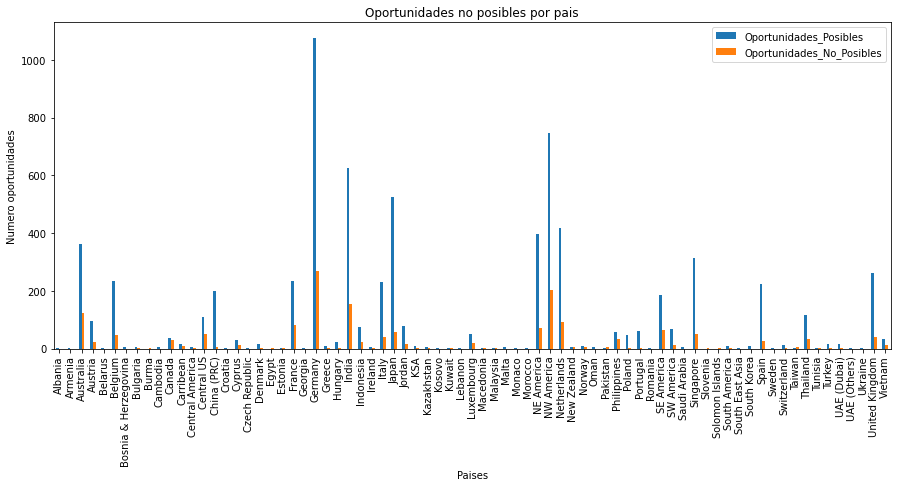

In [528]:
# Gráfico de barras preliminar para tener una vision de en cuales paises tenemos mayor probabilidad
# de al menos conseguir una oportunidad 
# Con esto nos damos cuenta que paises como alemania, japan, india tienen una gran cantidad de
# oportunidades aceptadas en cuanto a requisitos en, relacion a las oportunidades que no fueron aceptadas

oportunidades_posibles_por_territorio = oportunidades_factibles_trtr[['Oportunidades_Posibles']]
oportunidades_posibles_por_territorio['Oportunidades_No_Posibles'] \
    = oportunidades_no_factibles_trtr['Oportunidades_No_Posibles']

oportunidades_posibles_por_territorio.plot(kind = 'bar', title = 'Oportunidades no posibles por pais'\
    , linewidth = 4, figsize = (15,6))
ax = plt.gca()
ax.set_ylabel('Numero oportunidades')
ax.set_xlabel('Paises')
plt.show()

In [529]:
# Se realiza un último filtro para quedarnos solamente con los datos que corresponden a 
# oportunidades que son realmente posibles por no tener ningun inconveniente en aprobacion o en algun tipo
# de burocracia

#oportunidades = oportunidades.loc[oportunidades['Es_Oportunidad_Posible'] == 1]


#oportunidades.tail(5)

In [530]:
#Analizamos la cantidad de valores únicos de países que poseemos

oportunidades['Territory'].describe()

count        8779
unique         75
top       Germany
freq         1345
Name: Territory, dtype: object

In [531]:
#Filtramos los paises que tengan una cantidad razonable para analizar ya que en el gráfico de barras se ve que hay países
#poco razonables

cota = oportunidades['Territory'].value_counts().mean()/2
Cantidad_Paises = oportunidades.agg({'Territory': 'value_counts'})
Cantidad_Paises = Cantidad_Paises.reset_index()
Cantidad_Paises = Cantidad_Paises.rename({'Territory':'Cantidad_Paises'}, axis = 'columns')
oportunidades = oportunidades.merge(Cantidad_Paises, left_on='Territory', right_on='index')
oportunidades = oportunidades.loc[oportunidades.Cantidad_Paises >= cota]
oportunidades.Territory.value_counts()

Germany           1345
NW America         950
India              782
Japan              582
Netherlands        509
Australia          484
NE America         467
Singapore          364
France             318
United Kingdom     301
Belgium            281
Italy              269
Spain              249
SE America         248
China (PRC)        206
Central US         160
Thailand           149
Austria            118
Indonesia           95
Jordan              93
Philippines         89
SW America          80
Luxembourg          70
Canada              67
Portugal            64
Name: Territory, dtype: int64

In [532]:
#Con el describe podemos darnos cuenta de que de los 71 países originales, logramos quedarnos con 25 que son razonables para el
#análisis

oportunidades['Territory'].describe()

count        8340
unique         25
top       Germany
freq         1345
Name: Territory, dtype: object

In [533]:
##################################################################################################################
##################################################################################################################
#    LO DE ARRIBA IRIA BASICAMENTE TODO LO RELACIONADO A CASTEOS Y LIMPIEZA DE DATOS APARTIR DE ABAJO SE PUEDE   #
#              COMENZAR A ANALIZAR LA BASE DA DATOS EN FUNCION AL TARGET QUE TENEMOS QUE ES EL STAGE             #
#      SI DEBEMOS CASTEAR ALGO MAS O FILTRAR ALGO NUEVO LO HAREMOS ARRIBA PARA SEPARAR DEL ANALISIS DEL TARGET   #
##################################################################################################################
##################################################################################################################

In [534]:
#Obtenemos las oportunidades posibles y no posibles a partir de las condiciones de aprobación en el nuevo dataset.

oportunidades_factibles_trtr = oportunidades.groupby('Territory').agg({'Es_Oportunidad_Posible': 'sum'})
oportunidades_factibles_trtr = oportunidades_factibles_trtr.rename(columns = {'Es_Oportunidad_Posible'
                                                                         :'Oportunidades_Posibles'})

oportunidades_no_factibles_trtr = oportunidades.groupby('Territory').agg({'Es_Oportunidad_Posible': contar_ceros})
oportunidades_no_factibles_trtr = oportunidades_no_factibles_trtr.rename(columns = {'Es_Oportunidad_Posible'
                                                                         :'Oportunidades_No_Posibles'})

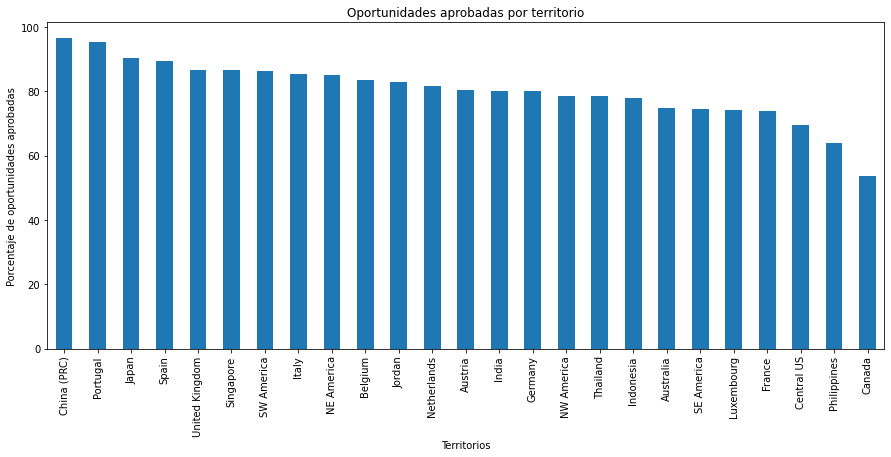

Territory
China (PRC)       96.60
Portugal          95.31
Japan             90.38
Spain             89.56
United Kingdom    86.71
Singapore         86.54
SW America        86.25
Italy             85.50
NE America        85.01
Belgium           83.63
Jordan            82.80
Netherlands       81.73
Austria           80.51
India             80.18
Germany           80.00
NW America        78.63
Thailand          78.52
Indonesia         77.89
Australia         74.79
SE America        74.60
Luxembourg        74.29
France            73.90
Central US        69.38
Philippines       64.04
Canada            53.73
dtype: float64

In [535]:
#Obtenemos el ratio de Aprobadas/No aprobadas para poder armar el nuevo gráfico de barras.

oportunidades_posibles_por_territorio = oportunidades_factibles_trtr[['Oportunidades_Posibles']]
oportunidades_posibles_por_territorio['Oportunidades_No_Posibles'] \
    = oportunidades_no_factibles_trtr['Oportunidades_No_Posibles']

oportunidades_ratio = (oportunidades_posibles_por_territorio['Oportunidades_Posibles']*100/
        (oportunidades_posibles_por_territorio['Oportunidades_Posibles']+\
         oportunidades_posibles_por_territorio['Oportunidades_No_Posibles'])).round(2)

oportunidades_ratio = oportunidades_ratio.sort_values(ascending=False)

#Realizamos el gráfico de barras.

oportunidades_ratio.plot(kind = 'bar', title = 'Oportunidades aprobadas por territorio', linewidth = 4, figsize = (15,6))
ax = plt.gca()
ax.set_ylabel('Porcentaje de oportunidades aprobadas')
ax.set_xlabel('Territorios')
plt.show()
oportunidades_ratio

In [536]:
#Quitamos aquellas filas en donde no se haya dado la aprobación, ya que la única razón para tenerlas es para saber
#la probabilidad de aprobación por territorio.

oportunidades = oportunidades.loc[oportunidades['Es_Oportunidad_Posible'] == 1]
oportunidades = oportunidades.drop('Es_Oportunidad_Posible', axis = 'columns')
oportunidades = oportunidades.reset_index()
oportunidades = oportunidades.drop('level_0', axis = 'columns')
oportunidades

,ID,Region,Territory,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,index,Cantidad_Paises
0,27446,Americas,NW America,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,...,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None,NW America,950
1,27455,Americas,NW America,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_8227,7,...,NaT,0,USD,50688.0,USD,50688.0,Closed Won,Prod_Category_A_None,NW America,950
2,21527,Americas,NW America,Bureaucratic_Code_4,2013-07-27,Source_11,United States,Account_Name_25,Opportunity_Name_1828,631,...,NaT,0,USD,2814.0,USD,2814.0,Closed Won,Prod_Category_A_None,NW America,950
3,21530,Americas,NW America,Bureaucratic_Code_4,2013-07-27,Source_11,United States,Account_Name_25,Opportunity_Name_1830,632,...,NaT,0,USD,55300.0,USD,55300.0,Closed Won,Prod_Category_A_None,NW America,950
4,21534,Americas,NW America,Bureaucratic_Code_4,2013-07-27,Source_11,United States,Account_Name_25,Opportunity_Name_1829,633,...,NaT,0,USD,103068.0,USD,103068.0,Closed Won,Prod_Category_A_None,NW America,950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6778,14058,Americas,Central US,Bureaucratic_Code_4,2018-04-19,Source_13,United States,Account_Name_706,Opportunity_Name_5016,8081,...,NaT,0,USD,25987.5,USD,25987.5,Closed Won,Prod_Category_A_None,Central US,160
6779,14063,Americas,Central US,Bureaucratic_Code_4,2018-04-19,Source_13,United States,Account_Name_706,Opportunity_Name_5017,8082,...,NaT,0,USD,28500.0,USD,28500.0,Closed Lost,Prod_Category_A_None,Central US,160
6780,5355,Americas,Central US,Bureaucratic_Code_4,2016-06-04,Source_7,United States,Account_Name_652,Opportunity_Name_409,8167,...,NaT,0,USD,62475.0,USD,62475.0,Closed Lost,Prod_Category_A_None,Central US,160
6781,14852,Americas,Central US,Bureaucratic_Code_4,2018-05-30,Source_7,United States,Account_Name_1890,Opportunity_Name_130,8408,...,NaT,1,USD,658350.0,USD,668550.0,Closed Lost,Prod_Category_A_None,Central US,160


In [537]:
oportunidades_stage = oportunidades.groupby('Territory').agg({'Stage':'value_counts'})
oportunidades_stage = oportunidades_stage.unstack()
oportunidades_stage.columns = ['Closed Lost', 'Closed Won', 'a', 'b']
oportunidades_stage = oportunidades_stage.drop(['a','b'], axis='columns')

oportunidades_stage_ratio = oportunidades_stage['Closed Won']*100/(oportunidades_stage['Closed Won']+oportunidades_stage['Closed Lost'])
oportunidades_stage_ratio = oportunidades_stage_ratio.sort_values(ascending = False)

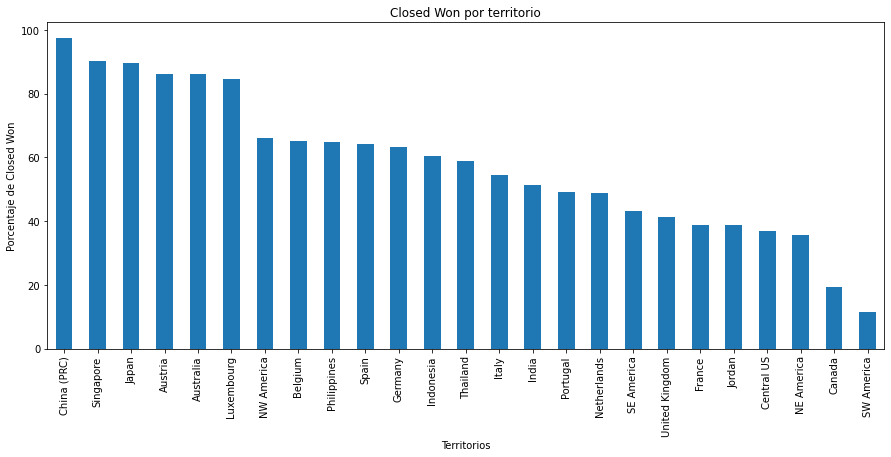

In [538]:
oportunidades_stage_ratio.plot(kind = 'bar', title = 'Closed Won por territorio', linewidth = 4, figsize = (15,6))
ax = plt.gca()
ax.set_ylabel('Porcentaje de Closed Won')
ax.set_xlabel('Territorios')
plt.show()

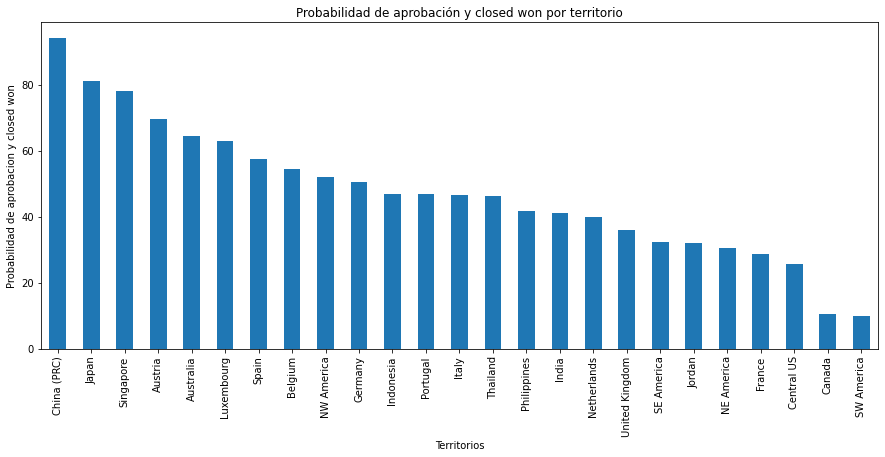

Territory
China (PRC)       94.17
Japan             81.08
Singapore         78.02
Austria           69.49
Australia         64.46
Luxembourg        62.86
Spain             57.43
Belgium           54.45
NW America        52.07
Germany           50.56
Indonesia         46.95
Portugal          46.87
Italy             46.47
Thailand          46.31
Philippines       41.57
India             41.11
Netherlands       39.98
United Kingdom    35.88
SE America        32.26
Jordan            32.02
NE America        30.41
France            28.62
Central US        25.63
Canada            10.45
SW America        10.00
dtype: float64

In [539]:
#Ahora conociendo la probabilidad de aprobacion, y la probabilidad de que haya closed won.
#Podemos obtener la probabilidad total multiplicando las mismas

probabilidad_total_closed_won = oportunidades_ratio*oportunidades_stage_ratio/100
probabilidad_total_closed_won = probabilidad_total_closed_won.round(2)
probabilidad_total_closed_won = probabilidad_total_closed_won.sort_values(ascending = False)

probabilidad_total_closed_won.plot(kind = 'bar', title = 'Probabilidad de aprobación y closed won por territorio', linewidth = 4, figsize = (15,6))
ax = plt.gca()
ax.set_ylabel('Probabilidad de aprobacion y closed won')
ax.set_xlabel('Territorios')
plt.show()
probabilidad_total_closed_won

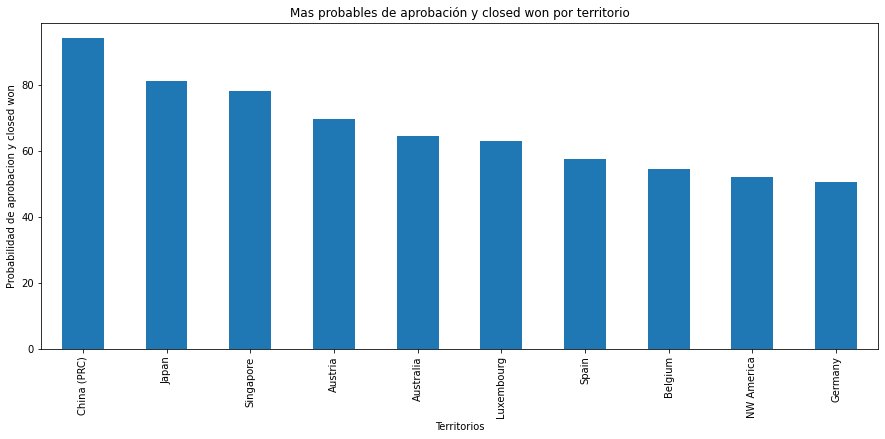

Territory
China (PRC)    94.17
Japan          81.08
Singapore      78.02
Austria        69.49
Australia      64.46
Luxembourg     62.86
Spain          57.43
Belgium        54.45
NW America     52.07
Germany        50.56
dtype: float64

In [542]:
#Entonces, a nosotros nos interesan los mejores países para invertir (Los más probables de obtener un closed won, y de que nos
#acepten).

probabilidad_total_closed_won_top_10 = probabilidad_total_closed_won.nlargest(10)

probabilidad_total_closed_won_top_10.plot(kind = 'bar', title = 'Mas probables de aprobación y closed won por territorio', linewidth = 4, figsize = (15,6))
ax = plt.gca()
ax.set_ylabel('Probabilidad de aprobacion y closed won')
ax.set_xlabel('Territorios')
plt.show()
probabilidad_total_closed_won_top_10